In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv", on_bad_lines='skip')
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1417412280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1417412340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1417412520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1024630,1482391020,854.80,856.98,854.80,856.98,69.949473,59869.378279,855.894628
1024631,1482391080,856.98,857.28,856.98,857.28,8.579080,7353.704363,857.167011
1024632,1482391140,856.03,857.69,856.02,857.69,5.915110,5068.042608,856.796003
1024633,1482391200,857.69,858.00,856.40,858.00,10.214876,8764.200201,857.984032
1024634,1482391260,858.00,858.00,857.99,858.00,2.716303,2330.578597,857.996399
1024635,1482391320,858.00,859.00,857.99,859.00,6.351036,5449.408526,858.034648
1024636,1482391380,859.00,860.00,859.00,860.00,11.956525,10272.214944,859.130451
1024637,1482391440,860.00,861.98,860.00,861.97,13.313565,11465.466661,861.186830
1024638,1482391500,861.97,861.98,861.97,861.98,1.111449,958.036161,861.970280
1024639,1482391560,861.98,862.68,861.98,862.68,7.821589,6743.849638,86.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024640 entries, 0 to 1024639
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1024640 non-null  int64  
 1   Open               928231 non-null   float64
 2   High               928231 non-null   float64
 3   Low                928231 non-null   float64
 4   Close              928231 non-null   float64
 5   Volume_(BTC)       928231 non-null   float64
 6   Volume_(Currency)  928231 non-null   float64
 7   Weighted_Price     928231 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 62.5 MB


In [6]:
df.isnull().sum()

,0
Timestamp,0
Open,96409
High,96409
Low,96409
Close,96409
Volume_(BTC),96409
Volume_(Currency),96409
Weighted_Price,96409


## **Pre-processing**

In [7]:
df.fillna(method='ffill', inplace=True)
df.head(10)

<ipython-input-7-e9d80a0c473d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0
5,1417412280,300.0,300.0,300.0,300.0,0.01,3.0,300.0
6,1417412340,300.0,300.0,300.0,300.0,0.01,3.0,300.0
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,300.0,300.0,300.0,300.0,0.01,3.0,300.0
9,1417412520,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [8]:
visualize_ffill = df.iloc[22145:22171]
print(visualize_ffill)

        Timestamp   Open    High    Low   Close  Volume_(BTC)  \
22145  1422241920  280.0  280.00  280.0  280.00        0.2140   
22146  1422241980  285.0  285.18  285.0  285.18        1.0137   
22147  1422242040  285.0  285.18  285.0  285.18        1.0137   
22148  1422242100  285.0  285.18  285.0  285.18        1.0137   
22149  1422242160  290.0  290.00  290.0  290.00        0.2000   
22150  1422242220  289.0  289.00  289.0  289.00        0.5000   
22151  1422242280  289.0  289.00  289.0  289.00        0.5000   
22152  1422242340  289.0  289.00  289.0  289.00        0.5000   
22153  1422242400  289.0  289.00  289.0  289.00        0.5000   
22154  1422242460  289.0  289.00  289.0  289.00        0.5000   
22155  1422242520  289.0  289.00  289.0  289.00        0.5000   
22156  1422242580  289.0  289.00  289.0  289.00        0.5000   
22157  1422242640  289.0  289.00  289.0  289.00        0.5000   
22158  1422242700  289.0  289.00  289.0  289.00        0.5000   
22159  1422242760  289.0 

In [9]:
df.isnull().sum()

,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume_(BTC),0
Volume_(Currency),0
Weighted_Price,0


In [10]:
# Converting the 'Timestamp' from Unix time to a readable datetime format
df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='s', utc=True)

# Removing timezone info
df['Datetime'] = df['Datetime'].dt.tz_convert(None)

# Set 'Datetime' as the index of the DataFrame
df.set_index('Datetime', inplace=True)

# Drop the original 'Timestamp' column
df.drop('Timestamp', axis=1, inplace=True)

In [11]:
df.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Datetime,,,,,,,
2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:34:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:35:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:36:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:37:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:38:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:39:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:40:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:41:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [12]:
# select close price
close_prices = df['Close'].values.reshape(-1, 1)

# normalize the close price data
scaler = MinMaxScaler()
close_price_scaled = scaler.fit_transform(close_prices)

## **Set tf.data.Dataset for model inputs**

In [13]:
# Creating the dataset fxn
def create_dataset(data, time_steps=96):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

time_steps = 96 # 24 hours of 1 minute data

# Create datasets
X, y = create_dataset(close_price_scaled, time_steps)

# Check shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1024544, 96, 1)
y shape: (1024544, 1)


In [14]:
# splitting into train and test sets

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [15]:
# converting the data to tf.data.Dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [16]:
# batch and prefetch

batch_size = 32
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

## **Model Architecture**

In [17]:
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 96, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## **Model Training**

In [18]:
history = model.fit(
    train_dataset,
    epochs=4,
    validation_data=test_dataset,
    verbose=1
)

Epoch 1/4
25614/25614 ━━━━━━━━━━━━━━━━━━━━ 565s 22ms/step - loss: 4.2572e-04 - val_loss: 0.0138
Epoch 2/4
25614/25614 ━━━━━━━━━━━━━━━━━━━━ 554s 22ms/step - loss: 2.8572e-04 - val_loss: 0.0129
Epoch 3/4
25614/25614 ━━━━━━━━━━━━━━━━━━━━ 564s 22ms/step - loss: 6.9409e-04 - val_loss: 0.0123
Epoch 4/4
25614/25614 ━━━━━━━━━━━━━━━━━━━━ 567s 22ms/step - loss: 0.0011 - val_loss: 0.0123


In [19]:
model.save('btc_forecasting_model.h5')

## **Evaluation**

In [20]:
train_loss = model.evaluate(train_dataset)
test_loss = model.evaluate(test_dataset)
print(f"Train MSE: {train_loss:.4f}")
print(f"Test MSE: {test_loss:.4f}")

25614/25614 ━━━━━━━━━━━━━━━━━━━━ 174s 7ms/step - loss: 0.2180
6404/6404 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 0.0036
Train MSE: 0.1530
Test MSE: 0.0123


In [21]:
# make predictions

predictions = model.predict(test_dataset)

6404/6404 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step


In [22]:

# reshape y_test to a 2D array
y_test_2d = y_test.reshape(-1, 1)

predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test_2d)

In [23]:
# calculating the MAE and RMSE

mae = np.mean(np.abs(predictions - y_test_inv))
rmse = np.sqrt(np.mean((predictions - y_test_inv)**2))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")

Mean Absolute Error: 62.90
Root Mean Square Error: 83.51


## **Visualization**

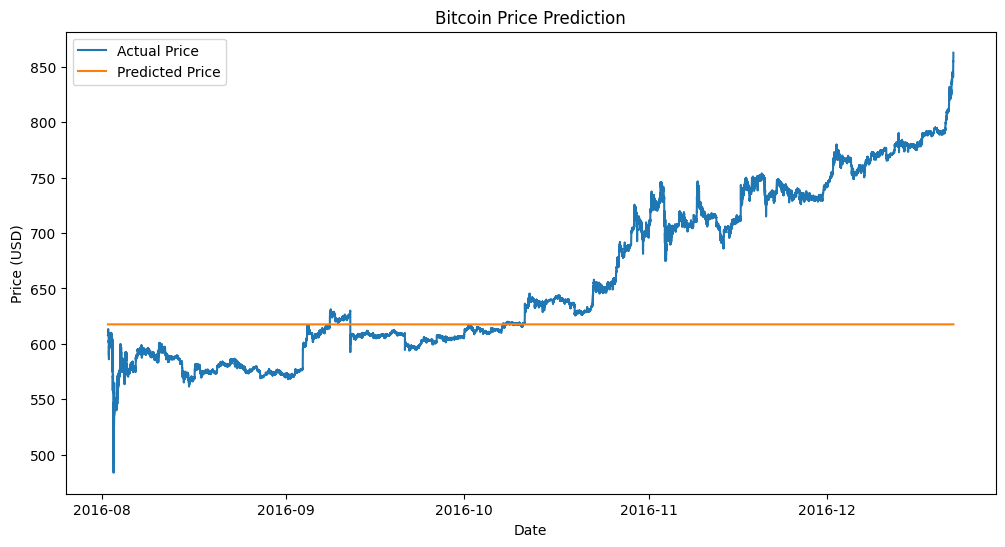

In [26]:
# Visualizations
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, label='Actual Price')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig('btc_price_prediction.png')